In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/user_log.csv')
df.head()

,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime
0,328862,323294,833,2661.0,2882,click,2024-08-29
1,328862,844400,1271,2661.0,2882,click,2024-08-29
2,328862,575153,1271,2661.0,2882,click,2024-08-29
3,328862,996875,1271,2661.0,2882,click,2024-08-29
4,328862,1086186,1271,1049.0,1253,click,2024-08-29


In [4]:
df[df['brand_id'] == 3738].head()

,user_id,item_id,cat_id,brand_id,merchant_id,action,datetime
487,356311,518537,1238,3738.0,3760,click,2024-09-17
609,356311,585057,1577,3738.0,3760,click,2024-11-11
627,356311,518537,1238,3738.0,3760,click,2024-09-09
883,186568,447180,1142,3738.0,3760,click,2024-11-07
1079,92396,625839,1577,3738.0,3760,click,2024-08-28


In [5]:
# Find datetime have action 'purcharse' max
df[df['action'] == 'purchase'].groupby('datetime')['action'].count().idxmax()

'2024-11-11'

In [9]:
# Find cat_id have action 'purcharse' max and frequency
purchase_counts = df[df['action'] == 'purchase'].groupby('cat_id')['action'].count()

# Tìm cat_id có số lần purchase tối đa
max_cat_id = purchase_counts.idxmax()

# Tìm tần suất (frequency) của cat_id đó
max_frequency = purchase_counts.max()

print(f"cat_id with maximum purchases: {max_cat_id}")
print(f"Frequency of purchases: {max_frequency}")

cat_id with maximum purchases: 1213
Frequency of purchases: 95353


In [18]:
# Find all item in cat_id 1213
filtered_df = df[(df['cat_id'] == 1213) & (df['action'] == 'purchase')]

# Tìm các item_id duy nhất
print(filtered_df['item_id'].unique())
print(len(filtered_df['item_id'].unique()))

[754044 670204 195714 ... 278505 482042 800348]
7366


In [23]:
# Top 10 age buy cat_id 1213
age_counts = df[(df['cat_id'] == 1213) & (df['action'] == 'purchase')].groupby('user_id')['action'].count()
age_counts

user_id
2         1
5         1
6         2
14        1
18        1
         ..
424140    7
424147    6
424160    4
424161    1
424163    2
Name: action, Length: 42700, dtype: int64

In [24]:
# Top 10 datetime buy cat_id 1213
datetime_counts = df[(df['cat_id'] == 1213) & (df['action'] == 'purchase')].groupby('datetime')['action'].count()
datetime_counts = datetime_counts.sort_values(ascending=False).head(10)
datetime_counts

datetime
2024-11-11    25851
2024-07-08     1500
2024-06-26     1276
2024-06-06      770
2024-07-10      719
2024-07-04      711
2024-08-13      695
2024-10-18      690
2024-08-18      659
2024-07-15      654
Name: action, dtype: int64

In [31]:
# Top 10 datetime have action 'purchase'
datetime_counts = df[df['action'] == 'purchase'].groupby('datetime')['action'].count()
datetime_counts = datetime_counts.sort_values(ascending=False).head(20)
datetime_counts

datetime
2024-11-11    1223354
2024-09-09      30908
2024-06-26      26548
2024-06-17      25801
2024-10-21      20155
2024-09-25      19067
2024-10-18      18188
2024-10-16      17770
2024-11-10      17249
2024-10-28      17082
2024-10-17      17019
2024-10-25      16910
2024-10-14      16878
2024-10-30      16794
2024-10-23      16792
2024-08-28      16738
2024-10-22      16567
2024-10-24      16005
2024-10-08      15895
2024-10-09      15795
Name: action, dtype: int64

In [30]:
# Top 10 datetime have action 'click'
datetime_counts = df[df['action'] == 'click'].groupby('datetime')['action'].count()
datetime_counts = datetime_counts.sort_values(ascending=False).head(15)
datetime_counts

datetime
2024-11-11    9188104
2024-11-10    2750192
2024-11-09    1102507
2024-11-08     879656
2024-11-07     777904
2024-11-06     739366
2024-11-05     679086
2024-11-04     645033
2024-11-03     544734
2024-11-01     518230
2024-11-02     512494
2024-06-26     506003
2024-10-31     484100
2024-10-30     477619
2024-10-28     323357
Name: action, dtype: int64

In [32]:
# Top 10 datetime have action 'add_to_cart'
datetime_counts = df[df['action'] == 'add-to-cart'].groupby('datetime')['action'].count()
datetime_counts = datetime_counts.sort_values(ascending=False).head(20)
datetime_counts

datetime
2024-11-11    14725
2024-11-10    11711
2024-11-09     4825
2024-11-08     3452
2024-11-07     3068
2024-11-06     2974
2024-11-05     2381
2024-11-04     2184
2024-11-03     2042
2024-11-02     1817
2024-11-01     1620
2024-10-31     1477
2024-10-30     1328
2024-10-29      530
2024-10-28      493
2024-10-27      445
2024-10-24      394
2024-10-21      388
2024-10-25      371
2024-10-23      369
Name: action, dtype: int64

In [33]:
# Top 10 datetime have action 'favourite'
datetime_counts = df[df['action'] == 'favourite'].groupby('datetime')['action'].count()
datetime_counts = datetime_counts.sort_values(ascending=False).head(20)
datetime_counts

datetime
2024-11-10    161674
2024-11-11    156450
2024-11-09     88548
2024-11-08     73270
2024-11-07     64054
2024-11-06     60277
2024-11-05     55108
2024-11-02     52609
2024-11-04     51335
2024-11-03     50825
2024-11-01     46152
2024-10-30     40958
2024-10-31     40949
2024-10-29     27847
2024-10-28     27513
2024-10-23     23838
2024-10-27     23706
2024-10-24     23687
2024-10-22     23234
2024-10-26     22854
Name: action, dtype: int64

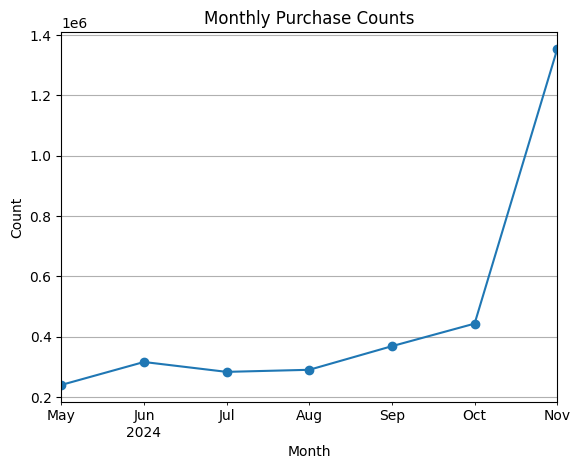

In [34]:
# Line chart for count action 'purchase' per month
import matplotlib.pyplot as plt

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.to_period('M')
monthly_counts = df[df['action'] == 'purchase'].groupby('month')['action'].count()
monthly_counts = monthly_counts.sort_index()
monthly_counts.plot(kind='line', marker='o')
plt.title('Monthly Purchase Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()

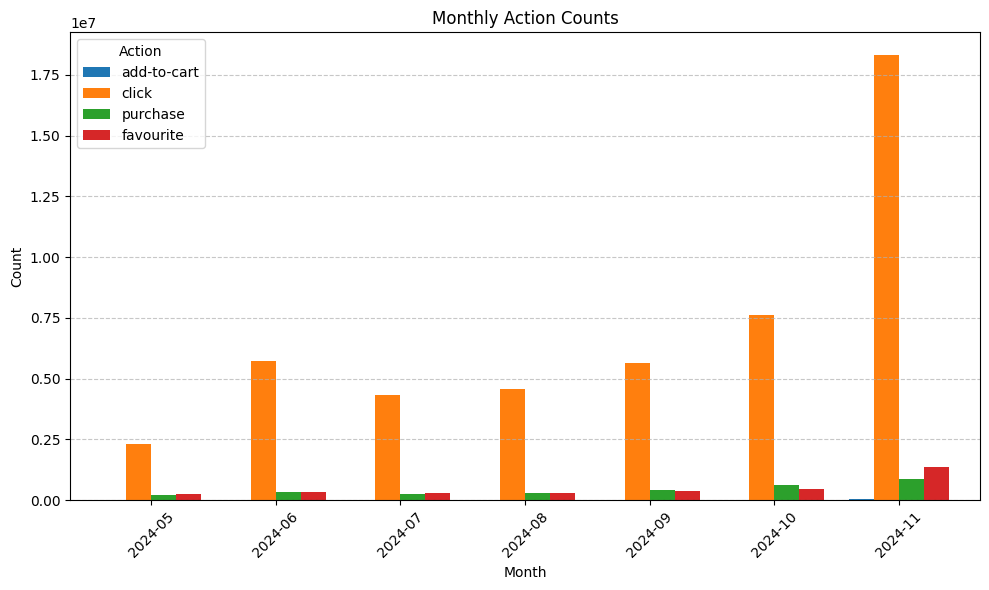

In [40]:
monthly_action_counts = df.groupby(['month', 'action'])['action'].count().unstack(fill_value=0)
monthly_action_counts = monthly_action_counts.sort_index()
monthly_action_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Monthly Action Counts')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Action', labels=['add-to-cart', 'click', 'purchase', 'favourite'])
plt.tight_layout()
plt.show()